In [1]:
import numpy as np
import pandas as pd
import time
import os
import pathlib
import copy
from matplotlib import pyplot as plt
from scipy import stats


answer = pd.read_csv('Answer_m1.csv')

std = 260
_n_hist = 10
_n_samples = 26

In [2]:
def load_data(_n = 0,_n_file = 7, start = 0) :
    _data = list()
    for i in range(start,_n_file+start) :
        data = pd.read_csv('Diff_History_{}_{}_Predict_v2.csv'.format(_n,i))
        _data.append(data)
    return _data

In [3]:
def dist_euclidean(data = '', answer='',robot='',step='',std = 260) :
    _x = '{}_{}_x'.format(step,robot)
    _y = '{}_{}_y'.format(step,robot)
    ans_x = answer[_x]
    data_x = data[_x]
    dist_x = (ans_x - data_x) * std

    ans_y = answer[_y]
    data_y = data[_y]
    dist_y = (ans_y - data_y) * std

    dist = np.sqrt(np.square(dist_x)+np.square(dist_y))
    average = np.average(dist)
    std = np.std(dist)
    return dist, average, std

In [4]:
def cal_result(data='',robots=['H','F1','F2','F3','F4'],_n_hist = 10,_n_samples=26,std=260) :
    _avgs = list()
#    _stds = list()
    for i in range(0,len(data)) :
        _tmp_avgs = list()
#        _tmp_stds = list()
        for j,_robot in enumerate(robots) :
            _tmp_avg = list()
#            _tmp_std = list()
            for step in range(_n_hist, _n_samples) :
                data1,avg1,std1 = dist_euclidean(data=data[i],answer=answer,std=std,
                                      robot=_robot,step=step)
                _tmp_avg.append(avg1)
 #               _tmp_std.append(std1)
            _tmp_avgs.append(_tmp_avg)
 #           _tmp_stds.append(_tmp_std)
        _avgs.append(_tmp_avgs)
 #       _stds.append(_tmp_stds)
 #  return _stds,_avgs
    return np.array(_avgs)

In [5]:
def find_average(data = '',_n_hist = 10,_n_samples=26,type = 0,_n_robot = 5,delete_list=[100,100],back=5,front=0) :
    ## data[i][j][k] -> i : Model // j -> Robots(H,F1,F2,F3,F4) // k -> steps
    result = list()
    _avgs = list()
    _stds = list()
    _data = list()
    for i in range(len(data)) :
        if i != delete_list[0] and i != delete_list[1] :
            _data.append(data[i])
    _data = np.array(_data)
    
    if type == 1 :
        for i in range(0,_n_robot) :
            _tmp_avgs = list()
            _tmp_stds = list()
            for j in range(0,_n_samples-_n_hist) : 
                _tmp_avgs.append(np.average(_data[:,i,j])/3)
                _tmp_stds.append(np.std(_data[:,i,j])/3)
        #            print(np.sum(data[:,i,j]))
    #            print(np.average(data[:,i,j]))
    #            _tmp_result.append(_sum/(3*len(data)))
            _avgs.append(_tmp_avgs)
            _stds.append(_tmp_stds)
    elif type == 2 :
        for i in range(0,len(data)) :
            _tmp_avgs = list()
            _tmp_stds = list()
            for j in range(0,_n_robot) :
                _tmp_avgs.append(np.average(data[i,j,front:_n_samples-_n_hist-back])/3)
                _tmp_stds.append(np.std(data[i,j,front:_n_samples-_n_hist-back])/3)                
            _avgs.append(_tmp_avgs)
            _stds.append(_tmp_stds)
    return np.array(_avgs),np.array(_stds)

In [6]:
def average_error(avg = '',length = 9) :
    _avgs = list()
    _stds = list()
    _total_avg = 0
    _total_n = 0
    for i in range(len(avg)) :
        _n = length+i
        _total_n += _n
        _avgs.append(np.average(avg[i,:_n]))
        _stds.append(np.std(avg[i,:_n]))
        _total_avg += np.sum(avg[i,:_n])
    _total_avg /= _total_n
    return _avgs,_stds,_total_avg


In [7]:
def temp_method(data='') :
    _tmp = list()
    for i in range(len(data)) :
        _tmp.append(np.average(data[i]))
    _tmp = np.array(_tmp)
    
    print('max : {} / min :{}'.format(np.argmax(_tmp),np.argmin(_tmp)))

    _data = list()
    for i in range(len(data)) :
        if np.argmax(_tmp) != i and np.argmin(_tmp) != i :
            _data.append(data[i])
    
    return np.array(_data),[np.argmax(_tmp),np.argmin(_tmp)]

In [12]:
#data_h12 = load_data(_n=12,_n_file=5)
data_h10 = load_data(_n=10,_n_file=10)
data_h8 = load_data(_n=8,_n_file=7,start=1)
data_h6 = load_data(_n=6,_n_file=10)
data_h4 = load_data(_n=4,_n_file=10)
data_h2 = load_data(_n=2,_n_file=10)

In [13]:
#result_h12 = cal_result(data=data_h12,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
result_h10 = cal_result(data=data_h10,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
result_h8 = cal_result(data=data_h8,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
result_h6 = cal_result(data=data_h6,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
result_h4 = cal_result(data=data_h4,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
result_h2 = cal_result(data=data_h2,_n_hist = _n_hist,_n_samples=_n_samples,std=std)

In [14]:
### H, F1, F2, F3, F4를 모델별로 구분 (5*5로 구성) type = 2
#avg_h12_t2 ,std_h12_t2= find_average(type = 2, data=result_h12,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h10_t2 ,std_h10_t2= find_average(type = 2,data=result_h10,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h8_t2 ,std_h8_t2= find_average(type = 2, data=result_h8,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h6_t2 ,std_h6_t2= find_average(type = 2, data=result_h6,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h4_t2 ,std_h4_t2= find_average(type = 2, data=result_h4,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h2_t2 ,std_h2_t2= find_average(type = 2, data=result_h2,_n_hist = _n_hist,_n_samples=_n_samples)

#avg_h12_t3,delete_list_h12 = temp_method(data=avg_h12_t2)
avg_h10_t3,delete_list_h10 = temp_method(data=avg_h10_t2)
avg_h8_t3,delete_list_h8 = temp_method(data=avg_h8_t2)
avg_h6_t3,delete_list_h6 = temp_method(data=avg_h6_t2)
avg_h4_t3,delete_list_h4 = temp_method(data=avg_h4_t2)
avg_h2_t3,delete_list_h2 = temp_method(data=avg_h2_t2)

max : 3 / min :5
max : 5 / min :1
max : 7 / min :4
max : 0 / min :4
max : 0 / min :2


In [15]:
print(avg_h10_t2)

[[14.55636409 13.00909578 10.84678606  8.75641325  6.05067319]
 [14.60524466 13.32200116 11.01560987  8.66440413  6.13483699]
 [14.04078739 12.41900071 10.70214514  8.53043379  6.05565305]
 [17.31115195 15.33602856 12.40084855  9.76070168  6.34672172]
 [14.56229359 13.081235   11.12227557  8.70622461  6.21759593]
 [14.01714952 12.49476288 10.58741413  8.41357742  5.96057402]
 [14.74458876 13.22391009 10.95980904  8.69440084  6.223948  ]
 [14.79729681 13.20228634 10.8199579   8.68718284  6.04091356]
 [14.90656426 13.3237562  11.05599497  8.79484705  6.12725335]
 [16.7602772  15.00603237 12.38548453  9.77940053  6.49986283]]


In [11]:
### Model들 전체 평균 -> H, F1, F2, F3, F4로 : type = 1
#avg_h12 ,std_h12= find_average(type = 1,data=result_h12,_n_hist = _n_hist,_n_samples=_n_samples,
#                              delete_list=delete_list_h12)
avg_h10 ,std_h10= find_average(type = 1,data=result_h10,_n_hist = _n_hist,_n_samples=_n_samples,
                              delete_list=delete_list_h10)
avg_h8 ,std_h8= find_average(type = 1, data=result_h8,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h8)
avg_h6 ,std_h6= find_average(type = 1, data=result_h6,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h6)
avg_h4 ,std_h4= find_average(type = 1, data=result_h4,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h4)
avg_h2 ,std_h2= find_average(type = 1, data=result_h2,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h2)


In [12]:
#avg_err_h12,std_err_h12, error_h12 = average_error(avg = avg_h12,length = 9) 
avg_err_h10,std_err_h10, error_h10 = average_error(avg = avg_h10,length = 9) 
avg_err_h8,std_err_h8, error_h8 = average_error(avg = avg_h8,length = 9) 
avg_err_h6,std_err_h6, error_h6 = average_error(avg = avg_h6,length = 9) 
avg_err_h4,std_err_h4, error_h4 = average_error(avg = avg_h4,length = 9)
avg_err_h2,std_err_h2, error_h2 = average_error(avg = avg_h2,length = 9) 

In [13]:
print(avg_h10_t3)

[[14.55636409 13.00909578 10.84678606  8.75641325  6.05067319]
 [14.60524466 13.32200116 11.01560987  8.66440413  6.13483699]
 [14.04078739 12.41900071 10.70214514  8.53043379  6.05565305]
 [14.56229359 13.081235   11.12227557  8.70622461  6.21759593]
 [14.74458876 13.22391009 10.95980904  8.69440084  6.223948  ]]


In [28]:
print(avg_h8_t3)

[[15.82497253 14.36304674 11.50336007  9.28925055  6.23557197]
 [15.73224373 14.14239201 11.40889878  9.06835842  5.96908275]
 [15.58727123 14.01853687 11.65695524  9.07004065  6.231461  ]
 [15.40257882 13.63484402 11.48372066  8.93665202  6.12479882]
 [15.36497675 13.5148901  11.13974289  8.7341581   6.03779083]]


6.05(2) 6.13(4) 6.05(2) 6.21 6.22 / 6.32 6.23 5.96(1) 6.23 6.12

In [13]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2, 3: F3, 4 : F4)
for _n in range(0,5,2) :
    Model_list = [avg_h10_t3[:,_n:_n+1],
                  #avg_h8_t3[:,_n:_n+1],
                  avg_h6_t3[:,_n:_n+1],
                  #avg_h4_t3[:,_n:_n+1],
                  avg_h2_t3[:,_n:_n+1]]
    result = np.array(np.zeros((len(Model_list),len(Model_list))))
    for i in range(0,len(Model_list)) :
        for j in range(i,len(Model_list)) :
            _result = stats.ttest_ind(Model_list[i],Model_list[j])
            result[i][j] = "%.3f"%(_result[1])
            result[j][i] = "%.3f"%(_result[1])

#    result = pd.DataFrame(result, columns = ['10','8','6','4','2'],index=['10','8','6','4','2'])
    result = pd.DataFrame(result, columns = ['10','6','2'],index=['10','6','2'])
    print(_n)
    print(result)

0
     10      6      2
10  1.0  0.000  0.000
6   0.0  1.000  0.239
2   0.0  0.239  1.000
2
       10      6      2
10  1.000  0.001  0.000
6   0.001  1.000  0.138
2   0.000  0.138  1.000
4
      10      6      2
10  1.00  0.130  0.000
6   0.13  1.000  0.003
2   0.00  0.003  1.000


## Draw Error bar

In [219]:
data_h6 = load_data(_n=6,_n_file=10,start=0)
result_h6 = cal_result(data=data_h6,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
avg_h6_t2 ,std_h6_t2= find_average(type = 2, data=result_h6,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h6_t3,delete_list_h6 = temp_method(data=avg_h6_t2)

avg_h6 ,std_h6= find_average(type = 1, data=result_h6,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h6)

In [220]:
print(avg_h6_t2)

[[15.66468644 14.10610853 11.62106739  8.80071271  5.84762413]
 [16.39318718 14.81643604 12.11051149  9.0902469   6.21992299]
 [16.3488307  14.75894254 11.90652423  9.39887294  5.9857516 ]
 [16.74739082 14.72278863 12.19676347  9.21590383  6.09939173]
 [14.64448123 13.04476275 10.87146446  8.57641716  5.90354619]
 [15.67382212 14.02690441 11.31213884  8.71428035  5.81022966]
 [16.68010299 14.71821217 12.22584115  9.52070061  6.19304258]
 [17.58366859 15.76160304 13.11689303 10.02745091  6.62190303]
 [17.03117511 15.22405875 12.4027037   9.65472929  6.53885408]
 [17.48460038 15.49579485 12.50180617  9.77401447  6.35396743]]


In [218]:
data_h2 = load_data(_n=2,_n_file=7,start=0)
result_h2 = cal_result(data=data_h2,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
avg_h2_t2 ,std_h2_t2= find_average(type = 2, data=result_h2,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h2_t3,delete_list_h2 = temp_method(data=avg_h2_t2)

avg_h2 ,std_h2= find_average(type = 1, data=result_h2,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h2)

In [186]:
data_h10 = load_data(_n=10,_n_file=7,start=0)
result_h10 = cal_result(data=data_h10,_n_hist = _n_hist,_n_samples=_n_samples,std=std)
avg_h10_t2 ,std_h10_t2= find_average(type = 2, data=result_h10,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h10_t3,delete_list_h10 = temp_method(data=avg_h10_t2)

avg_h10 ,std_h10= find_average(type = 1, data=result_h10,_n_hist = _n_hist,_n_samples=_n_samples,
                            delete_list=delete_list_h10)

In [155]:
### H, F1, F2, F3, F4를 모델별로 구분 (5*5로 구성) type = 2
_back = 5
_front = 0
#avg_h12_t2 ,std_h12_t2= find_average(type = 2, data=result_h12,_n_hist = _n_hist,_n_samples=_n_samples)
avg_h10_t2 ,std_h10_t2= find_average(type = 2,data=result_h10,_n_hist = _n_hist,_n_samples=_n_samples,back=_back,front=_front)
avg_h8_t2 ,std_h8_t2= find_average(type = 2, data=result_h8,_n_hist = _n_hist,_n_samples=_n_samples,back=_back,front=_front)
avg_h6_t2 ,std_h6_t2= find_average(type = 2, data=result_h6,_n_hist = _n_hist,_n_samples=_n_samples,back=_back,front=_front)
avg_h4_t2 ,std_h4_t2= find_average(type = 2, data=result_h4,_n_hist = _n_hist,_n_samples=_n_samples,back=_back,front=_front)
avg_h2_t2 ,std_h2_t2= find_average(type = 2, data=result_h2,_n_hist = _n_hist,_n_samples=_n_samples,back=_back,front=_front)

#avg_h12_t3,delete_list_h12 = temp_method(data=avg_h12_t2)
avg_h10_t3,delete_list_h10 = temp_method(data=avg_h10_t2)
avg_h8_t3,delete_list_h8 = temp_method(data=avg_h8_t2)
avg_h6_t3,delete_list_h6 = temp_method(data=avg_h6_t2)
avg_h4_t3,delete_list_h4 = temp_method(data=avg_h4_t2)
avg_h2_t3,delete_list_h2 = temp_method(data=avg_h2_t2)

In [14]:
_x_avg = list()
_x_std = list()
'''
for i in range(0,5) :
    _x_tmp = [#np.average(avg_h12_t2[:,i]),
             np.average(avg_h10_t2[:,i]),
             np.average(avg_h8_t2[:,i]),
             np.average(avg_h6_t2[:,i]),
             np.average(avg_h4_t2[:,i]),
             np.average(avg_h2_t2[:,i])]
    _x_tmp_std = [#np.std(avg_h12_t2[:,i]),
             np.std(avg_h10_t2[:,i]),
             np.std(avg_h8_t2[:,i]),
             np.std(avg_h6_t2[:,i]),
             np.std(avg_h4_t2[:,i]),
             np.std(avg_h2_t2[:,i])]
 '''
for i in range(4,-1,-2) :
    _x_tmp = [np.average(avg_h2_t3[:,i]),
#             np.average(avg_h4_t3[:,i]),
             np.average(avg_h6_t3[:,i]),
#             np.average(avg_h8_t3[:,i]),
             np.average(avg_h10_t3[:,i])]#,np.average(avg_h12_t2[:,i])]
    _x_tmp_std = [np.std(avg_h2_t3[:,i]),
#            np.std(avg_h4_t3[:,i]),
             np.std(avg_h6_t3[:,i]),
#           np.std(avg_h8_t3[:,i]),
             np.std(avg_h10_t3[:,i])]#,np.std(avg_h12_t2[:,i])]
    _x_avg.append(_x_tmp)
    _x_std.append(_x_tmp_std)


Text(0, 0.5, 'Average Error Distance(cm)')

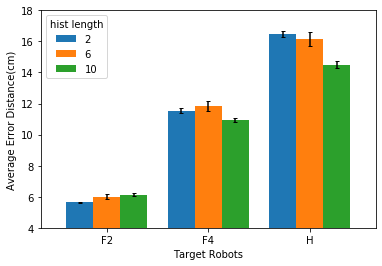

In [15]:
_x = pd.DataFrame(_x_avg,columns = pd.Index(['2','6','10'], name="hist length"),index =['F2','F4','H'])
_x_std = pd.DataFrame(_x_std,columns = [#'12',
                                        '2','6','10'],index =['F2','F4','H'])
ax1 = _x.plot(kind='bar',yerr=_x_std,capsize=2, rot=0,width=0.8, ylim=(4,18),figsize=(6,4))
#ax1.set_title('Diffrences of history length')
ax1.set_xlabel('Target Robots')
ax1.set_ylabel('Average Error Distance(cm)')


In [31]:
print(_x)

hist length          2         4,          6          8         10
F4            5.651216   5.963789   5.992584   6.119741   6.136541
F3            8.782341   9.011615   9.044003   9.019692   8.670375
F2           11.534062  11.799594  11.829401  11.438536  10.929325
F1           14.407391  14.558028  14.486236  13.934742  13.011049
H            16.469746  16.407351  16.165583  15.582409  14.501856


In [18]:
print(_x_std)

           2        4,         6         8        10
F4  0.041780  0.261008  0.153235  0.121789  0.075005
F3  0.077549  0.307089  0.255158  0.143734  0.076006
F2  0.148878  0.418098  0.325849  0.140556  0.144241
F1  0.260449  0.325016  0.344918  0.314369  0.315421
H   0.212230  0.329147  0.428161  0.284743  0.240340


In [ ]:
6.92 7.74 8.2 8.39 8.729

2.1618718532783996
1.6276140523982665
1.8437335815185243
1.2288995817401425
---
2.391079109477534
1.8612566393097385
2.069451601648044
1.420003764204811
---
2.58644652933061
2.1288593852485356
2.119510919911093
1.364264803739827
---
2.5516928421043445
2.1035837878256114
2.118423551259328
1.6125068039216153
---
2.5884840166743013
2.0796200827701874
2.340125185321776
1.7537142892591415
---
    F4        F3        F2        F1         H
10   0  2.161872  3.789486  5.633219  6.862119
8    0  2.391079  4.252336  6.321787  7.741791
6    0  2.586447  4.715306  6.834817  8.199082
4    0  2.551693  4.655277  6.773700  8.386207
2    0  2.588484  4.668104  7.008229  8.761944


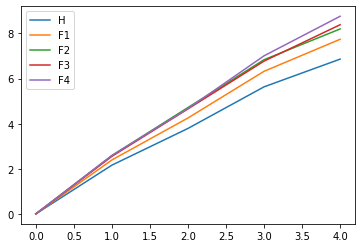

In [26]:
_robots = ['H','F1','F2','F3','F4']
_hist_len = ['10','8','6','4','2']
#_a = [5.1585, 5.3218, 5.2672, 5.0755, 4.8117]
_a = [0,0,0,0,0]
slope = list()
for i in range(5) :
    _tmp_slope = list()
    _tmp_slope.append(_a[i])
    for j in range(3,-1,-1) :
        _slope = _x[_hist_len[i]][_robots[j]]-_x[_hist_len[i]][_robots[j+1]]
        _a[i]+=_slope
        _tmp_slope.append(_a[i])
        print(_slope)
    print('---')
    slope.append(_tmp_slope)


slopes = pd.DataFrame(slope, columns =['F4','F3','F2','F1','H'],index=['10','8','6','4','2'])
print(slopes)
slope = np.array(slope)
for i in range(5) :
    plt.plot(slope[:][i],label='{}'.format(_robots[i]))

#plt.xticks(['F4->F3','F3->F2','F3->F2','F2->F1','F1->H'])
plt.legend()

Text(0.5, 0, 'Robot')

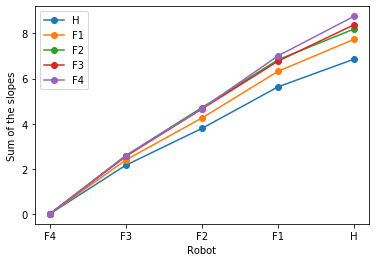

In [22]:
_x_name = ['F4','F3','F2','F1','H']


for i in range(5) :
    plt.errorbar(_x_name,slope[:][i],label='{}'.format(_robots[i]),fmt="o-")
    
plt.legend()
plt.ylabel('Sum of the slopes')
plt.xlabel('Robot')


In [41]:
print(slope[:,4])

[6.86211907 7.74179111 8.19908164 8.38620699 8.76194357]


IndexError: index 3 is out of bounds for axis 1 with size 3

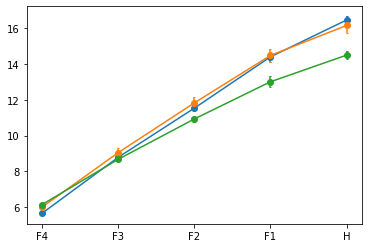

In [19]:
#x = list()
#for i in range(0,len(avg_h12[0])) :
#    x.append(i)
title = ['H','F1','F2','F3','F4']

x = ['F4','F3','F2','F1','H']
labels = ['2','4','6','8','10']
_num = 0

_x_avg = np.array(_x_avg)
_x_std = np.array(_x_std)

for i in range(0,5) :
    plt.errorbar(x,_x_avg[:,i],_x_std[:,i],fmt="o-",capsize=1,label = '{}'.format(labels[i]))
plt.title('')
plt.legend()
plt.xlabel('Target Robots')
plt.ylabel('Average Error Distance(cm)')

plt.show()

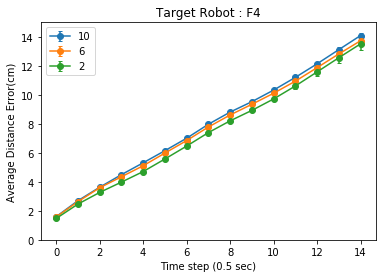

In [23]:
_n = 4
_title = ['H','F1','F2','F3','F4']

_x = list()
for i in range(0,_n+11):
    _x.append(i)
    
    
plt.errorbar(_x,avg_h10[_n,:11+_n],yerr=std_h10[_n,:11+_n],label='10',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h8[_n,:9+_n],yerr=std_h8[_n,:9+_n],label='8',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h6[_n,:11+_n],yerr=std_h6[_n,:11+_n],label='6',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h4[_n,:9+_n],yerr=std_h4[_n,:9+_n],label='4',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h2[_n,:11+_n],yerr=std_h2[_n,:11+_n],label='2',capsize=2,fmt="o-")
plt.legend()
plt.ylim((0,15))

plt.xlabel('Time step (0.5 sec)')
plt.ylabel('Average Distance Error(cm)')
plt.title('Target Robot : {}'.format(_title[_n]))
plt.show()

In [31]:
_n = 4
h10_substract = list()
h6_substract = list()
h2_substract = list()
for i in range(0,11+_n-1) :
    h10_substract.append(avg_h10[_n,i+1:i+2]-avg_h10[_n,i:i+1])
    h6_substract.append(avg_h6[_n,i+1:i+2]-avg_h6[_n,i:i+1])
    h2_substract.append(avg_h2[_n,i+1:i+2]-avg_h2[_n,i:i+1])
    
h10_substract = np.array(h10_substract)
h6_substract = np.array(h6_substract)
h2_substract = np.array(h2_substract)

print(h10_substract)
print(h6_substract)
print(h2_substract)

[[1.10172654]
 [0.92898245]
 [0.8676439 ]
 [0.8174056 ]
 [0.83611389]
 [0.85953863]
 [0.96324895]
 [0.83986379]
 [0.71816259]
 [0.79880829]
 [0.87596488]
 [0.93667922]
 [0.97821799]
 [0.97283738]]
[[1.0534522 ]
 [0.95899488]
 [0.75549676]
 [0.76164749]
 [0.87301466]
 [0.86392126]
 [0.93478257]
 [0.83036728]
 [0.73701012]
 [0.76245803]
 [0.8328676 ]
 [0.93222404]
 [0.94669522]
 [0.90950374]]
[[0.99296211]
 [0.8046825 ]
 [0.71108421]
 [0.7278634 ]
 [0.86640906]
 [0.89086684]
 [0.93049008]
 [0.81183417]
 [0.71984257]
 [0.78919549]
 [0.89343441]
 [0.9710476 ]
 [0.9801294 ]
 [0.95707034]]


In [63]:
_n = 0
print(np.average(avg_h6[_n,:11]-avg_h2[_n,:11]))
print(np.average(avg_h6[_n,:11]))
print(np.average(avg_h2[_n,:11]))

-0.30416303840471204
16.165583451459895
16.469746489864608


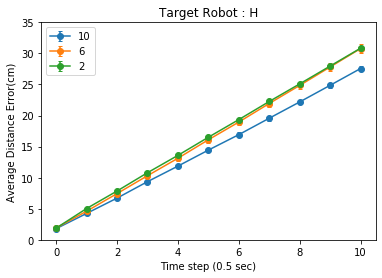

In [42]:
_n = 0
_title = ['H','F1','F2','F3','F4']

_x = list()
for i in range(0,_n+11):
    _x.append(i)
    
    
plt.errorbar(_x,avg_h10[_n,:11+_n],yerr=std_h10[_n,:11+_n],label='10',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h8[_n,:11+_n],yerr=std_h8[_n,:11+_n],label='8',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h6[_n,:11+_n],yerr=std_h6[_n,:11+_n],label='6',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h4[_n,:11+_n],yerr=std_h4[_n,:11+_n],label='4',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h2[_n,:11+_n],yerr=std_h2[_n,:11+_n],label='2',capsize=2,fmt="o-")
plt.legend()
plt.ylim((0,35))
plt.xlabel('Time step (0.5 sec)')
plt.ylabel('Average Distance Error(cm)')
plt.title('Target Robot : {}'.format(_title[_n]))
plt.show()

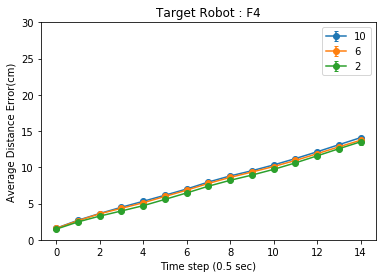

In [35]:
_n = 4
_title = ['H','F1','F2','F3','F4']

_x = list()
for i in range(0,_n+11):
    _x.append(i)
    
    
plt.errorbar(_x,avg_h10[_n,:11+_n],yerr=std_h10[_n,:11+_n],label='10',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h8[_n,:9+_n],yerr=std_h8[_n,:9+_n],label='8',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h6[_n,:11+_n],yerr=std_h6[_n,:11+_n],label='6',capsize=2,fmt="o-")
#plt.errorbar(_x,avg_h4[_n,:9+_n],yerr=std_h4[_n,:9+_n],label='4',capsize=2,fmt="o-")
plt.errorbar(_x,avg_h2[_n,:11+_n],yerr=std_h2[_n,:11+_n],label='2',capsize=2,fmt="o-")
plt.legend()
plt.xlabel('Time step (0.5 sec)')
plt.ylim((0,30))

plt.ylabel('Average Distance Error(cm)')
plt.title('Target Robot : {}'.format(_title[_n]))
plt.show()

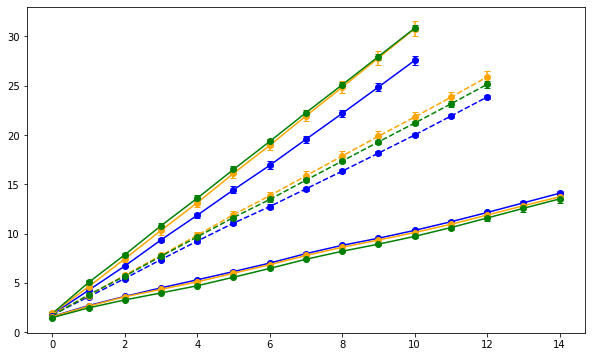

In [64]:
s_line = ['o-','o--','o--','o','o-']

fig, ax1 = plt.subplots(nrows=1,ncols=1, sharey=False, figsize=(10, 6))

for _n in range(0,5,2) :
    _x = list()
    for i in range(0,_n+11):
        _x.append(i)
    ax1 = plt.errorbar(_x,avg_h10[_n,:11+_n],yerr=std_h10[_n,:11+_n],label='10',capsize=3,fmt=s_line[_n],color='blue')
    #plt.errorbar(_x,avg_h8[_n,:9+_n],yerr=std_h8[_n,:9+_n],label='8',capsize=2,fmt="o-")
    ax1 = plt.errorbar(_x,avg_h6[_n,:11+_n],yerr=std_h6[_n,:11+_n],label='6',capsize=3,fmt=s_line[_n],color='orange')
    #plt.errorbar(_x,avg_h4[_n,:9+_n],yerr=std_h4[_n,:9+_n],label='4',capsize=2,fmt="o-")
    ax1 = plt.errorbar(_x,avg_h2[_n,:11+_n],yerr=std_h2[_n,:11+_n],label='2',capsize=3,fmt=s_line[_n],color='g')
    



In [29]:
_n = 0
for _n in range(0,5,2) :
    print( '{} --- 10 6 2 순'.format(_n))
    print(avg_h10[_n,:11+_n])
    print(avg_h6[_n,:11+_n])
    print(avg_h2[_n,:11+_n])

0 --- 10 6 2 순
[ 1.79603623  4.24526034  6.71139132  9.35849489 11.86208447 14.43782438
 16.92411383 19.56619345 22.1878947  24.86444221 27.56667687]
[ 1.90399965  4.60409224  7.43763853 10.31650554 13.12657748 16.09946004
 18.95231369 21.93835957 24.84535785 27.81429906 30.78281432]
[ 1.88505653  5.03698721  7.85150656 10.79750821 13.58984659 16.50595578
 19.34537726 22.26209542 25.09292669 27.9612503  30.83870084]
2 --- 10 6 2 순
[ 1.7694081   3.5868066   5.44005068  7.36389785  9.2372677  11.05754833
 12.74130222 14.53546552 16.33278188 18.15798863 20.00005898 21.92202635
 23.85370715]
[ 1.83194107  3.71620083  5.78268117  7.78172024  9.82911359 11.91599482
 13.84255707 15.86280996 17.86295594 19.87489188 21.82254536 23.82969203
 25.89418268]
[ 1.67222728  3.78422034  5.68366185  7.69194755  9.66622486 11.63034369
 13.45940449 15.42215819 17.35615381 19.29642252 21.21191805 23.15470451
 25.13898438]
4 --- 10 6 2 순
[ 1.59443279  2.69615934  3.62514179  4.49278569  5.31019129  6.146305

# slopes

In [29]:
_n_steps = 8
_t_robot = ['H','F1','F2','F3','F4']
for i in range(0,5) :
    print(_t_robot[i])
    print('H10 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_h10[i][0],
                                                                    _n_steps+i,
                                                                    avg_h10[i][_n_steps+i],
                                                                    avg_h10[i][_n_steps+i]-avg_h10[i][0],
                                                                    (avg_h10[i][_n_steps+i]-avg_h10[i][0])/(_n_steps+i+1)))
    print('H8 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_h8[i][0],
                                                                    _n_steps+i,
                                                                    avg_h8[i][_n_steps+i],
                                                                    avg_h8[i][_n_steps+i]-avg_h8[i][0],
                                                                    (avg_h8[i][_n_steps+i]-avg_h8[i][0])/(_n_steps+i+1)))
    print('H6 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_h6[i][0],
                                                                    _n_steps+i,
                                                                    avg_h6[i][_n_steps+i],
                                                                    avg_h6[i][_n_steps+i]-avg_h6[i][0],
                                                                    (avg_h6[i][_n_steps+i]-avg_h6[i][0])/(_n_steps+i+1)))
    print('H4 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_h4[i][0],
                                                                    _n_steps+i,
                                                                    avg_h4[i][_n_steps+i],
                                                                    avg_h4[i][_n_steps+i]-avg_h4[i][0],
                                                                    (avg_h4[i][_n_steps+i]-avg_h4[i][0])/(_n_steps+i+1)))
    print('H2 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_h2[i][0],
                                                                    _n_steps+i,
                                                                    avg_h2[i][_n_steps+i],
                                                                    avg_h2[i][_n_steps+i]-avg_h2[i][0],
                                                                    (avg_h2[i][_n_steps+i]-avg_h2[i][0])/(_n_steps+i+1)))
    print('------------')

H
H10 = 0 : 1.6688786363741432  // 8 : 22.366707531530242 // dist = 20.6978288951561, slope = 2.2997587661284555
H8 = 0 : 1.807039903136256  // 8 : 24.495460490235484 // dist = 22.688420587099227, slope = 2.520935620788803
H6 = 0 : 1.9128729584895325  // 8 : 25.19942901042917 // dist = 23.286556051939638, slope = 2.587395116882182
H4 = 0 : 1.8427573881694013  // 8 : 25.018878097760876 // dist = 23.176120709591473, slope = 2.5751245232879416
H2 = 0 : 1.817928896321474  // 8 : 25.161959624284147 // dist = 23.344030727962675, slope = 2.593781191995853
------------
F1
H10 = 0 : 1.632578054213261  // 9 : 22.092686800919655 // dist = 20.460108746706393, slope = 2.0460108746706394
H8 = 0 : 1.73166332381356  // 9 : 23.978568358709936 // dist = 22.246905034896375, slope = 2.2246905034896374
H6 = 0 : 1.8438314258211062  // 9 : 24.98918710520378 // dist = 23.145355679382675, slope = 2.3145355679382673
H4 = 0 : 1.7419687276882856  // 9 : 24.33176875658653 // dist = 22.589800028898246, slope = 2.25

### Total average error

In [130]:
def total_error(data='',length = 9) :
    _sums = list()
    for i in range(len(data)) :
        _sum = 0
#        _n = 0
        for j in range(len(data[i])) :
            _sum += data[i][j]*length
#            _n += j
        _sum /= length*len(data)
        _sums.append(_sum)
    return _sums, np.average(_sums), np.std(_sums)

In [131]:
print(_x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [134]:
#_err_h12,_err_avg_h12,_err_std_h12 = total_error(data=avg_h12_t2,length=9)
_err_h10,_err_avg_h10,_err_std_h10 = total_error(data=avg_h10_t2,length=9)
_err_h8,_err_avg_h8,_err_std_h8 = total_error(data=avg_h8_t2,length=9)
_err_h6,_err_avg_h6,_err_std_h6 = total_error(data=avg_h6_t2,length=9)
_err_h4,_err_avg_h4,_err_std_h4 = total_error(data=avg_h4_t2,length=9)
_err_h2,_err_avg_h2,_err_std_h2 = total_error(data=avg_h2_t2,length=9)

In [146]:
print(_err_h10)
print(_err_h8)

[6.274776323567874, 6.407933135263247, 6.16292697591676, 7.151624722311605, 6.161210639901734, 6.187722991102686, 6.450538396522844]
[6.821547864225267, 6.896330907286384, 6.435259902603737, 6.68809121826789, 6.6748472589018295, 6.716475025740859, 7.019806394619217]


In [140]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2, 3: F3, 4 : F4)
Model_list = [_err_h10,_err_h8,_err_h6,_err_h4,_err_h2]
result = np.array(np.zeros((5,5)))
for i in range(0,5) :
    for j in range(i,5) :
        _result = stats.ttest_ind(Model_list[i],Model_list[j])
        result[i][j] = "%.3f"%(_result[1])
        result[j][i] = "%.3f"%(_result[1])
        
result = pd.DataFrame(result, columns = ['10','8','6','4','2'],index=['10','8','6','4','2'])
print(_n)
print(result)

4
       10      8      6      4      2
10  1.000  0.038  0.006  0.032  0.037
8   0.038  1.000  0.126  0.497  0.849
6   0.006  0.126  1.000  0.603  0.202
4   0.032  0.497  0.603  1.000  0.605
2   0.037  0.849  0.202  0.605  1.000


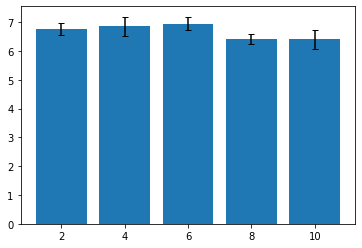

In [141]:
y = [_err_avg_h2,_err_avg_h4,_err_avg_h6,_err_avg_h10, _err_avg_h10]
y_std = [_err_std_h2, _err_std_h4,_err_std_h6, _err_std_h8, _err_std_h10]
plt.bar(('2','4','6','8','10'),y,yerr=y_std,capsize=3)
plt.show()

In [31]:
print(avg_err_h12)
print(avg_err_h10)
print(avg_err_h8)
print(avg_err_h6)
print(avg_err_h4)
print(avg_err_h2)

[12.44218682405544, 12.310234991228146, 11.165278150760239, 9.613928821189576, 6.941146140112695]
[12.30992270747948, 12.196881012126934, 11.048746141872178, 9.384620974801004, 6.880178745298116]
[12.906406799760033, 12.801994526986713, 11.398650988462787, 9.819112239930162, 7.056302409573396]
[13.294213867394243, 13.240431634885647, 11.862132352307993, 9.94735040897505, 6.916688435522271]
[13.662237014594615, 13.280540925859645, 11.855396093637166, 9.95506422531625, 6.833654534199933]
[13.695491901464239, 13.152771061844215, 11.527015975895829, 9.641508042385022, 6.594737030670194]


In [32]:
print(np.average(avg_err_h12))
print(np.average(avg_err_h10))
print(np.average(avg_err_h8))
print(np.average(avg_err_h6))
print(np.average(avg_err_h4))
print(np.average(avg_err_h2))

10.494554985469218
10.364069916315541
10.796493392942619
11.052163339817039
11.117378558721521
10.9223048024519


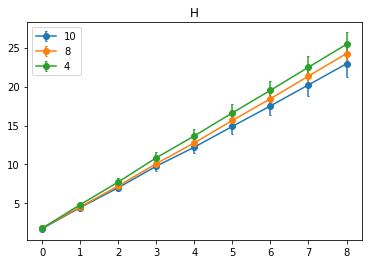

In [127]:
x = list()
for i in range(0,len(avg_h12[0])) :
    x.append(i)

title = ['H','F1','F2','F3','F4']
_num = 0

#plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h12[_num,:len(avg_h12[0])-5+_num],std_h12[_num,:len(avg_h12[0])-5+_num],
#                fmt="o-",capsize=1,label = '12')
plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h10[_num,:len(avg_h12[0])-5+_num],std_h10[_num,:len(avg_h12[0])-5+_num],
                fmt="o-",capsize=1,label = '10')
plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h8[_num,:len(avg_h12[0])-5+_num],std_h8[_num,:len(avg_h12[0])-5+_num],
                fmt="o-",capsize=1,label = '8')
#plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h6[_num,:len(avg_h6[0])-5+_num],std_h6[_num,:len(avg_h12[0])-5+_num],
#                fmt="o-",capsize=1,label = '6')
plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h4[_num,:len(avg_h6[0])-5+_num],std_h4[_num,:len(avg_h12[0])-5+_num],
               fmt="o-",capsize=1,label = '4')
#plt.errorbar(x[:len(avg_h12[0])-5+_num],avg_h2[_num,:len(avg_h6[0])-5+_num],std_h2[_num,:len(avg_h12[0])-5+_num],
#               fmt="o-",capsize=1,label = '2')
#for i in range(0,len(avg_h12)) :
#    plt.errorbar(x[:len(avg_h12[0])-5+i],avg_h12[i,:len(avg_h12[0])-5+i],std_h12[i,:len(avg_h12[0])-5+i],
#                 fmt="o-",capsize=3,label = '{}'.format(i))
plt.title('{}'.format(title[_num]))
plt.legend()
plt.show()

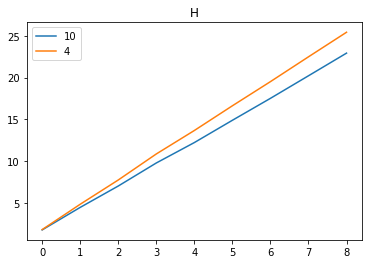

In [125]:
title = ['H','F1','F2','F3','F4']
_num = 0

#plt.plot(avg_h12[_num,:9+_num],label='12')
plt.plot(avg_h10[_num,:9+_num],label='10')
#plt.plot(avg_h8[_num,:9+_num],label='8')
#plt.plot(avg_h6[_num,:9+_num],label='6')
plt.plot(avg_h4[_num,:9+_num],label='4')
#plt.plot(avg_h2[_num,:9+_num],label='2')

plt.title('{}'.format(title[_num]))
plt.legend()
plt.show()


In [99]:
print(avg_h2[_num])
print(avg_h4[_num])
print(avg_h6[_num])
print(avg_h8[_num])
print(avg_h10[_num])
print(avg_h12[_num])

[4.59382440e+00 6.95970914e+00 9.37850775e+00 1.17810443e+01
 1.42903600e+01 1.71090755e+01 2.00203165e+01 2.31482015e+01
 2.61321616e+01 2.93718890e+01 3.29284286e+01 3.66212569e+01
 4.01406024e+01 4.82843073e-16]
[4.97193828e+00 7.78393950e+00 1.02082326e+01 1.24745225e+01
 1.48124692e+01 1.74699366e+01 2.01371830e+01 2.29296228e+01
 2.57155299e+01 2.87151276e+01 3.21168041e+01 3.56652474e+01
 3.92739466e+01 4.82843073e-16]
[5.30076451e+00 8.40726308e+00 1.11590078e+01 1.35117147e+01
 1.60083852e+01 1.89471100e+01 2.17981162e+01 2.48206271e+01
 2.77946647e+01 3.09543481e+01 3.45243805e+01 3.83634800e+01
 4.21036852e+01 4.82843073e-16]
[5.29678984e+00 8.22481885e+00 1.08202200e+01 1.35724632e+01
 1.63734185e+01 1.93301195e+01 2.24648255e+01 2.56087727e+01
 2.85392424e+01 3.19518567e+01 3.57067758e+01 3.95294086e+01
 4.32094945e+01 4.82843073e-16]
[5.27637791e+00 8.01284121e+00 1.06103069e+01 1.33291630e+01
 1.62668577e+01 1.94184806e+01 2.26734377e+01 2.59558475e+01
 2.92880746e+01 3.